# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
       # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | launceston
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | pokhara
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | kalabo
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | maningrida
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | uddevalla
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of 

Processing Record 41 of Set 4 | mnogovershinnyy
Processing Record 42 of Set 4 | nelson bay
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | kathu
Processing Record 45 of Set 4 | sabang
Processing Record 46 of Set 4 | tolaga bay
Processing Record 47 of Set 4 | satitoa
City not found. Skipping...
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | fortuna
Processing Record 0 of Set 5 | sibu
Processing Record 1 of Set 5 | santa ana
Processing Record 2 of Set 5 | heihe
Processing Record 3 of Set 5 | verkhnevilyuysk
Processing Record 4 of Set 5 | otane
Processing Record 5 of Set 5 | kudat
Processing Record 6 of Set 5 | honningsvag
Processing Record 7 of Set 5 | high level
Processing Record 8 of Set 5 | uyuni
Processing Record 9 of Set 5 | road town
Processing Record 10 of Set 5 | provideniya
Processing Record 11 of Set 5 | landau
Processing Record 12 of Set 5 | mooi river
City not found. Skipping...
Processing Record 13 of Set 5 | mount gambier
Pro

Processing Record 31 of Set 8 | luwuk
Processing Record 32 of Set 8 | abalak
Processing Record 33 of Set 8 | grand-santi
Processing Record 34 of Set 8 | boston
Processing Record 35 of Set 8 | kota belud
Processing Record 36 of Set 8 | amderma
City not found. Skipping...
Processing Record 37 of Set 8 | amazar
Processing Record 38 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 8 | hihifo
City not found. Skipping...
Processing Record 40 of Set 8 | bodden town
Processing Record 41 of Set 8 | araouane
Processing Record 42 of Set 8 | celestun
Processing Record 43 of Set 8 | jaszjakohalma
Processing Record 44 of Set 8 | saint anthony
Processing Record 45 of Set 8 | emerald
Processing Record 46 of Set 8 | cutcut
Processing Record 47 of Set 8 | hambantota
Processing Record 48 of Set 8 | srednekolymsk
Processing Record 49 of Set 8 | khani
Processing Record 0 of Set 9 | usinsk
Processing Record 1 of Set 9 | rayong
Processing Record 2 of Set 9 | santa rosa
Processing Record 3 of 

Processing Record 19 of Set 12 | halmstad
Processing Record 20 of Set 12 | mancio lima
Processing Record 21 of Set 12 | villa bruzual
Processing Record 22 of Set 12 | pauini
Processing Record 23 of Set 12 | marzuq
Processing Record 24 of Set 12 | vohibinany
Processing Record 25 of Set 12 | lexington
Processing Record 26 of Set 12 | jurbarkas
Processing Record 27 of Set 12 | nhulunbuy
Processing Record 28 of Set 12 | collecchio
Processing Record 29 of Set 12 | kegayli
City not found. Skipping...
Processing Record 30 of Set 12 | tommot
Processing Record 31 of Set 12 | margate
Processing Record 32 of Set 12 | riaba
City not found. Skipping...
Processing Record 33 of Set 12 | pevek
Processing Record 34 of Set 12 | bridlington
Processing Record 35 of Set 12 | portland
Processing Record 36 of Set 12 | lake city
Processing Record 37 of Set 12 | bassar
Processing Record 38 of Set 12 | mulchen
Processing Record 39 of Set 12 | kastrakion
Processing Record 40 of Set 12 | bonthe
Processing Record 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,launceston,-41.4500,147.1667,293.95,49,100,3.09,AU,1675914291
1,butaritari,3.0707,172.7902,300.57,82,65,9.15,KI,1675914150
2,bluff,-46.6000,168.3333,286.37,56,77,8.33,NZ,1675914114
3,carnarvon,-24.8667,113.6333,303.94,53,63,6.73,AU,1675914292
4,kahului,20.8947,-156.4700,297.16,69,20,7.20,US,1675914004


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,launceston,-41.4500,147.1667,293.95,49,100,3.09,AU,1675914291
1,butaritari,3.0707,172.7902,300.57,82,65,9.15,KI,1675914150
2,bluff,-46.6000,168.3333,286.37,56,77,8.33,NZ,1675914114
3,carnarvon,-24.8667,113.6333,303.94,53,63,6.73,AU,1675914292
4,kahului,20.8947,-156.4700,297.16,69,20,7.20,US,1675914004


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

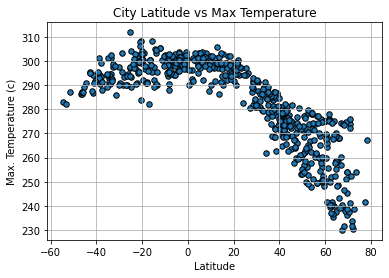

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

# Incorporate the other graph properties
plt.ylabel("Max. Temperature (c)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

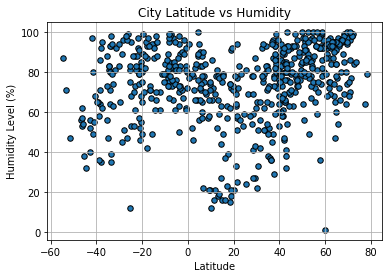

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=30, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

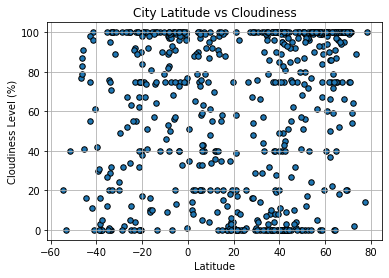

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=30, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

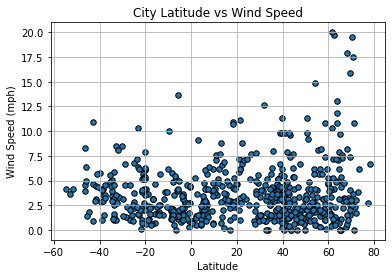

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=30, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_arr = np.array(x)
    line = slope * x_arr + intercept
    line_eq = "y = " + str(slope) + "x + " + str(intercept)
    plt.plot(x, y, 'o', x, line)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print("the r value is :", r_value)
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,butaritari,3.0707,172.7902,300.57,82,65,9.15,KI,1675914150
4,kahului,20.8947,-156.4700,297.16,69,20,7.20,US,1675914004
5,pokhara,28.2333,83.9833,291.63,41,54,2.52,NP,1675914293
6,kodiak,57.7900,-152.4072,268.88,36,0,3.09,US,1675914293
10,yellowknife,62.4560,-114.3525,251.79,84,75,4.12,CA,1675914282


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,launceston,-41.4500,147.1667,293.95,49,100,3.09,AU,1675914291
2,bluff,-46.6000,168.3333,286.37,56,77,8.33,NZ,1675914114
3,carnarvon,-24.8667,113.6333,303.94,53,63,6.73,AU,1675914292
7,hobart,-42.8794,147.3294,294.97,56,75,4.63,AU,1675913710
8,busselton,-33.6500,115.3333,301.09,35,0,1.30,AU,1675914294


###  Temperature vs. Latitude Linear Regression Plot

the r value is : -0.869570958018774


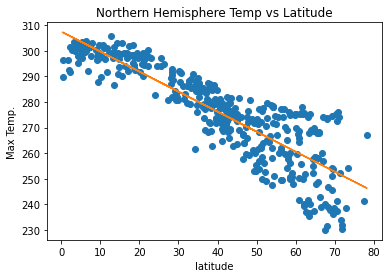

In [69]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
xlabel = "latitude"
ylabel = "Max Temp."
title ="Northern Hemisphere Temp vs Latitude"
create_linear_regression_plot(x, y, title, xlabel, ylabel)


the r value is : 0.5168089927052781


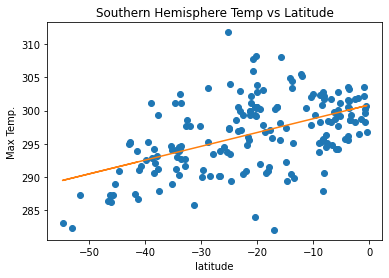

In [70]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
xlabel = "latitude"
ylabel = "Max Temp."
title ="Southern Hemisphere Temp vs Latitude"
create_linear_regression_plot(x, y, title, xlabel, ylabel)


**Discussion about the linear relationship:**  For the northern Hemisphere as the latitude increases the temerature decreases there is a strong negative linear relationship between the max temp and latitude.
For the southern hemisphere as the latitude increases the temerature increases as well, there is a moderate positive linear relationship between the max temp and latitude.

### Humidity vs. Latitude Linear Regression Plot

the r value is : 0.40753600089272796


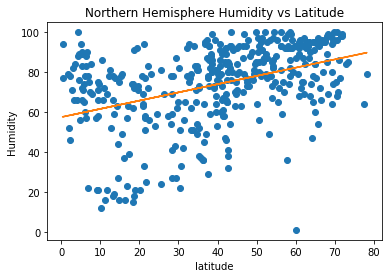

In [71]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
xlabel = "latitude"
ylabel = "Humidity"
title ="Northern Hemisphere Humidity vs Latitude"
create_linear_regression_plot(x, y, title, xlabel, ylabel)

the r value is : 0.32698707546066524


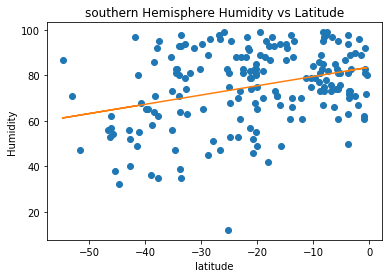

In [74]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
xlabel = "latitude"
ylabel = "Humidity"
title ="southern Hemisphere Humidity vs Latitude"
create_linear_regression_plot(x, y, title, xlabel, ylabel)

**Discussion about the linear relationship:** Both Northern and Southern Hemisphere have a slightly below moderate linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

the r value is : 0.2925435320051483


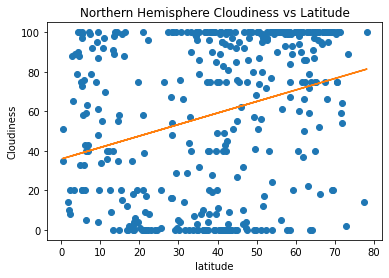

In [73]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
xlabel = "latitude"
ylabel = "Cloudiness"
title ="Northern Hemisphere Cloudiness vs Latitude"
create_linear_regression_plot(x, y, title, xlabel, ylabel)

the r value is : 0.35108579240764903


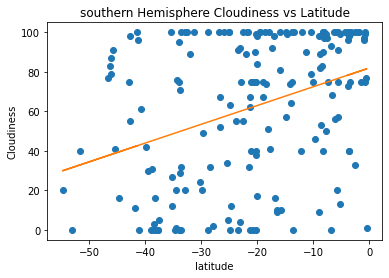

In [75]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
xlabel = "latitude"
ylabel = "Cloudiness"
title ="southern Hemisphere Cloudiness vs Latitude"
create_linear_regression_plot(x, y, title, xlabel, ylabel)

**Discussion about the linear relationship:** Both Northern and Southern Hemisphere have a weak linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

the r value is : 0.10771466253066064


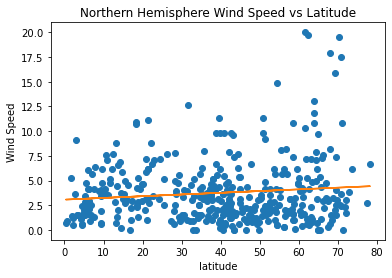

In [76]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
xlabel = "latitude"
ylabel = "Wind Speed"
title ="Northern Hemisphere Wind Speed vs Latitude"
create_linear_regression_plot(x, y, title, xlabel, ylabel)

the r value is : -0.2249636180818894


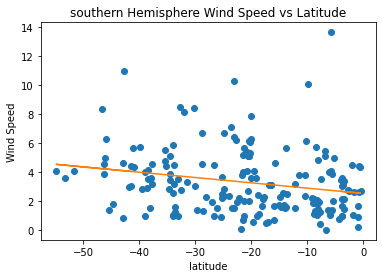

In [77]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
xlabel = "latitude"
ylabel = "Wind Speed"
title ="southern Hemisphere Wind Speed vs Latitude"
create_linear_regression_plot(x, y, title, xlabel, ylabel)

**Discussion about the linear relationship:** The Northern Hemisphere has a weak linear relationship. The Southern Hemisphere has a weak negative linear relationship.